In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import csv
from IPython.display import display, HTML
from matplotlib import pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import string
import re
pd.options.display.float_format = '${:10,.0f}'.format

Populating the interactive namespace from numpy and matplotlib


In [2]:
xl = pd.ExcelFile('../com_booking_mapped_2016_Q3M3W4.xlsx')
df_com = xl.parse('com_booking_mapped_2016')

In [3]:
xl = pd.ExcelFile('../ent_booking_mapped_2016_Q3M3W4.xlsx')
df_ent = xl.parse('ent_booking_mapped_2016')

In [4]:
grouped_a = df_com.groupby('fiscal_quarter_id')['booking_net'].sum()
grouped_a.sum()

321075780.12855506

In [5]:
grouped_b = df_ent.groupby('fiscal_quarter_id')['booking_net'].sum()
grouped_b.sum()

324155585.8466296

In [6]:
len(df_com.index)

310435

In [7]:
len(df_ent.index)

226850

In [8]:
df_ent.columns

Index([u'id', u'bookings_adjustments_code',
       u'bookings_adjustments_description', u'bookings_adjustments_type',
       u'at_attach', u'business_unit', u'customer_name', u'erp_deal_id',
       u'sales_order_number_detail', u'fiscal_period_id', u'fiscal_quarter_id',
       u'fiscal_week_id', u'partner_name', u'product_family', u'product_id',
       u'tbm', u'sales_level_2', u'sales_level_3', u'sales_level_4',
       u'sales_level_5', u'sales_level_6', u'scms', u'sub_scms',
       u'tms_level_1_sales_allocated', u'tms_level_2_sales_allocated',
       u'tms_level_3_sales_allocated', u'tms_level_4_sales_allocated',
       u'technology_group', u'partner_tier_code', u'partner_certification',
       u'partner_type', u'bill_to_site_city', u'ship_to_city', u'cbn_flag',
       u'booking_net', u'internal_business_entity_name',
       u'internal_sub_business_entity_name', u'services_indicator',
       u'unique_name', u'mapable', u'mapped_name', u'gaining_sub_scms',
       u'remarks', u'where_

In [9]:
def create_new_com_cols(df):
    #df.gaining_sales_level_2.fillna(df.new_sales_level_2, inplace=True)
    df.gaining_sales_level_3.fillna(df.sales_level_3, inplace=True)
    df.gaining_sales_level_4.fillna(df.sales_level_4, inplace=True)
    df.gaining_sales_level_5.fillna(df.sales_level_5, inplace=True)
    df.gaining_sales_level_6.fillna(df.sales_level_6, inplace=True)
    return df

def create_new_com_cols2(df):
    #df.gaining_sales_level_2.fillna(df.sales_level_2, inplace=True)
    df.gaining_sales_level_3.fillna(df.sales_level_3, inplace=True)
    df.gaining_sales_level_4.fillna(df.sales_level_4, inplace=True)
    df.gaining_sales_level_5.fillna(df.sales_level_5, inplace=True)
    df.gaining_sales_level_6.fillna(df.sales_level_6, inplace=True)
    return df

df_com1 = create_new_com_cols(df_com)
df_ent1 = create_new_com_cols2(df_ent)


In [10]:
df_com_no_cloud = df_com1[-df_com1.bookings_adjustments_code.str.startswith('LC')]
df_ent_no_cloud = df_ent1[-df_ent1.bookings_adjustments_code.str.startswith('LC')]

In [11]:
df_com_prod_no_cloud = df_com[-df_com.bookings_adjustments_code.str.startswith('LC') & (df_com.services_indicator == 'N') & -(df_com.fiscal_period_id == 201612) & (df_com.mapable == 'Yes')]
df_ent_prod_no_cloud = df_ent[-df_ent.bookings_adjustments_code.str.startswith('LC') & (df_ent.services_indicator == 'N') & -(df_ent.fiscal_period_id == 201612) & (df_ent.mapable == 'Yes')]

In [ ]:
cols = ['sales_level_2','sales_level_3','sales_level_4', 'sales_level_5','sales_level_6',
        'customer_name', 'mapped_name', 'mapable', 'booking_net', 'sales_order_number_detail', 'tbm',
       'gaining_sales_level_2','gaining_sales_level_3','gaining_sales_level_4', 'gaining_sales_level_5','gaining_sales_level_6',]
df_com_moving_out = df_com_prod_no_cloud[cols]
df_ent_moving_out = df_ent_prod_no_cloud[cols]
df_com_moving_out.sales_level_2 = 'INDIA_AREA'
df_com_moving_out.gaining_sales_level_5 = 'UNKNOWN'
df_com_moving_out.gaining_sales_level_6 = 'UNKNOWN'
df_ent_moving_out.sales_level_2 = 'INDIA_AREA'
#df_ent_moving_out.gaining_sales_level_5 = 'UNKNOWN'
#df_ent_moving_out.gaining_sales_level_6 = 'UNKNOWN'

In [15]:
cols2 = ['sales_level_2','sales_level_3','sales_level_4', 'sales_level_5','sales_level_6',
        'customer_name', 'mapped_name', 'sales_order_number_detail', 'tbm',
       'gaining_sales_level_2','gaining_sales_level_3','gaining_sales_level_4', 'gaining_sales_level_5','gaining_sales_level_6',]
df_ent_moving_out_grouped = DataFrame({'booking': df_ent_moving_out.groupby(cols2).booking_net.sum()}).reset_index()
df_com_moving_out_grouped = DataFrame({'booking': df_com_moving_out.groupby(cols2).booking_net.sum()}).reset_index()
df_com_moving_out.groupby(['mapable']).booking_net.sum()


mapable
Yes   $38,760,431
Name: booking_net, dtype: float64

In [16]:
writer = pd.ExcelWriter('../unique_com_account_movement_2016.xlsx', engine='xlsxwriter')
df_com_moving_out_grouped.to_excel(writer, sheet_name='Moving_Out')
df_ent_moving_out_grouped.to_excel(writer, sheet_name='Moving_In')
writer.save()

In [17]:
df_all = pd.concat([df_com1, df_ent1])

In [18]:
df_all_no_cloud = pd.concat([df_com_no_cloud, df_ent_no_cloud])

In [21]:
df_ent_no_cloud.pivot_table('booking_net', index=['mapable'], columns=['gaining_sales_level_3'], aggfunc=sum, margins=True, fill_value=0)

gaining_sales_level_3,INDIA_AREA-MISCL3,INDIA_COMM_1,INDIA_ENTERPRISE_1,INDIA_GROWTH_VERTICA,INDIA_MISC,All
mapable,,,,,,
No,"$ -61,071",$ 0,"$340,298,868","$13,266,036","$-30,552,840","$322,950,993"
Yes,$ 0,"$11,718,791",$ 0,$ 0,$ 0,"$11,718,791"
All,"$ -61,071","$11,718,791","$340,298,868","$13,266,036","$-30,552,840","$334,669,784"


In [20]:
df_all.pivot_table(values='booking_net', index='sales_level_3', columns='fiscal_quarter_id', aggfunc=sum, margins=True)

fiscal_quarter_id,2016Q1,2016Q2,2016Q3,2016Q4,All
sales_level_3,,,,,
CLOUD OFFSET INDIA A,"$-3,932,963","$-5,828,150","$-6,539,560","$-3,228,840","$-19,529,513"
INDIA_AREA-MISCL3,$ 0,$ 0,"$ -11,772","$ -49,298","$ -61,071"
INDIA_COMM_1,"$71,976,542","$76,795,124","$90,426,648","$81,877,466","$321,075,780"
INDIA_ENTERPRISE_1,"$73,582,364","$94,969,394","$108,192,484","$84,214,791","$360,959,033"
INDIA_GROWTH_VERTICA,"$ 3,605,264","$ 7,709,337","$ -60,951","$ 2,041,358","$13,295,007"
INDIA_MISC,"$-7,836,981","$-8,822,129","$-7,720,161","$-6,128,599","$-30,507,870"
All,"$137,394,226","$164,823,575","$184,286,688","$158,726,877","$645,231,366"


In [22]:
df_all_no_cloud.pivot_table('booking_net', index=['mapable'], columns=['gaining_sales_level_3'], aggfunc=sum, margins=True, fill_value=0)

gaining_sales_level_3,GSP,INDIA_AREA-MISCL3,INDIA_COMM_1,INDIA_ENTERPRISE_1,INDIA_GROWTH_VERTICA,INDIA_MISC,All
mapable,,,,,,,
No,$ 0,"$ -61,071","$257,424,473","$340,298,868","$13,266,036","$-30,552,840","$580,375,466"
Yes,"$ 1,763,602",$ 0,"$11,718,791","$51,373,508",$ 0,$ 0,"$64,855,900"
All,"$ 1,763,602","$ -61,071","$269,143,263","$391,672,375","$13,266,036","$-30,552,840","$645,231,366"


In [23]:
df_all_no_cloud.pivot_table(values='booking_net', index=['gaining_sales_level_3'], columns='sales_level_3', aggfunc=sum, margins=True, fill_value=0)

sales_level_3,INDIA_AREA-MISCL3,INDIA_COMM_1,INDIA_ENTERPRISE_1,INDIA_GROWTH_VERTICA,INDIA_MISC,All
gaining_sales_level_3,,,,,,
GSP,$ 0,"$ 1,763,602",$ 0,$ 0,$ 0,"$ 1,763,602"
INDIA_AREA-MISCL3,"$ -61,071",$ 0,$ 0,$ 0,$ 0,"$ -61,071"
INDIA_COMM_1,$ 0,"$257,424,473","$11,673,821",$ 0,"$ 44,970","$269,143,263"
INDIA_ENTERPRISE_1,$ 0,"$51,373,508","$340,298,868",$ 0,$ 0,"$391,672,375"
INDIA_GROWTH_VERTICA,$ 0,$ 0,$ 0,"$13,266,036",$ 0,"$13,266,036"
INDIA_MISC,$ 0,$ 0,$ 0,$ 0,"$-30,552,840","$-30,552,840"
All,"$ -61,071","$310,561,582","$351,972,688","$13,266,036","$-30,507,870","$645,231,366"


In [24]:
df_prod_no_cloud = df_all_no_cloud[df_all_no_cloud.services_indicator == 'N']

In [25]:
df_com_prod_no_cloud = df_com_no_cloud[df_com_no_cloud.services_indicator == 'N']
df_com_prod_no_cloud.pivot_table(values='booking_net', index=['gaining_sales_level_3'], columns='sales_level_3', aggfunc=sum, margins=True, fill_value=0)

sales_level_3,INDIA_COMM_1,All
gaining_sales_level_3,,
GSP,"$ 805,473","$ 805,473"
INDIA_COMM_1,"$206,515,506","$206,515,506"
INDIA_ENTERPRISE_1,"$43,233,425","$43,233,425"
All,"$250,554,404","$250,554,404"


In [26]:
df_prod_no_cloud.pivot_table(values='booking_net', index=['gaining_sales_level_3'], columns='sales_level_3', aggfunc=sum, margins=True, fill_value=0)

sales_level_3,INDIA_AREA-MISCL3,INDIA_COMM_1,INDIA_ENTERPRISE_1,INDIA_GROWTH_VERTICA,INDIA_MISC,All
gaining_sales_level_3,,,,,,
GSP,$ 0,"$ 805,473",$ 0,$ 0,$ 0,"$ 805,473"
INDIA_AREA-MISCL3,"$ -180,499",$ 0,$ 0,$ 0,$ 0,"$ -180,499"
INDIA_COMM_1,$ 0,"$206,515,506","$ 8,473,701",$ 0,"$ -20,238","$214,968,969"
INDIA_ENTERPRISE_1,$ 0,"$43,233,425","$257,706,193",$ 0,$ 0,"$300,939,619"
INDIA_GROWTH_VERTICA,$ 0,$ 0,$ 0,"$12,928,981",$ 0,"$12,928,981"
INDIA_MISC,$ 0,$ 0,$ 0,$ 0,"$-23,194,159","$-23,194,159"
All,"$ -180,499","$250,554,404","$266,179,894","$12,928,981","$-23,214,397","$506,268,384"


In [27]:
df_com_funnel = pd.read_excel('../com_funnel_mapped.xlsx')
df_ent_funnel = pd.read_excel('../ent_funnel_mapped.xlsx')

In [28]:
df_com_funnel.columns

Index([u'sales coverage code', u'level 01 territory', u'level 02 territory',
       u'level 03 territory', u'level 04 territory', u'level 05 territory',
       u'level 06 territory', u'opportunity owner', u'opportunity owner alias',
       u'forecasting position', u'customer_name', u'account name (english)',
       u'primary partner', u'expected product ($000s) (converted) currency',
       u'expected product ($000s) (converted)',
       u'opportunity line value ($000s) (converted) currency',
       u'opportunity line value ($000s) (converted)',
       u'expected product discount%', u'deal id', u'sales path',
       u'technology & service name', u'mix %', u'opportunity status',
       u'forecast status', u'stage', u'opportunity name',
       u'expected book date', u'created date', u'fiscal period',
       u'fiscal month', u'fiscal week of month', u'fiscal week',
       u'fiscal month of qtr', u'deals desk status',
       u'opportunity owner email', u'opportunity id', u'product family',

In [29]:
df_com_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='level 03 territory', columns='forecast status', aggfunc=sum, margins=True, fill_value=0)

forecast status,Commit,Not Forecastable,Upside,All
level 03 territory,,,,
INDIA_COMM_1,"$ 68,519","$ 22,252","$ 185,803","$ 276,574"
INDIA_ENTERPRISE_1,"$ 106,000","$ 443,771","$ 412,052","$ 961,823"
INDIA_GROWTH_VERTICAL,"$ 2,500","$ 30,002","$ 11,163","$ 43,665"
All,"$ 177,019","$ 496,025","$ 609,018","$ 1,282,062"


In [30]:
df_ent_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='level 03 territory', columns='forecast status', aggfunc=sum, margins=True, fill_value=0)

forecast status,Commit,Not Forecastable,Upside,All
level 03 territory,,,,
INDIA_COMM_1,"$ 68,519","$ 22,252","$ 185,803","$ 276,574"
INDIA_ENTERPRISE_1,"$ 106,000","$ 443,771","$ 412,052","$ 961,823"
INDIA_GROWTH_VERTICAL,"$ 2,500","$ 30,002","$ 11,163","$ 43,665"
All,"$ 177,019","$ 496,025","$ 609,018","$ 1,282,062"


In [31]:
df_com_funnel = df_com_funnel[df_com_funnel['level 03 territory'] == 'INDIA_COMM_1']
df_ent_funnel = df_ent_funnel[-(df_ent_funnel['level 03 territory'] == 'INDIA_COMM_1')]

In [32]:
df_com_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='level 03 territory', columns='forecast status', aggfunc=sum, margins=True, fill_value=0)

forecast status,Commit,Not Forecastable,Upside,All
level 03 territory,,,,
INDIA_COMM_1,"$ 68,519","$ 22,252","$ 185,803","$ 276,574"
All,"$ 68,519","$ 22,252","$ 185,803","$ 276,574"


In [33]:
df_ent_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='level 03 territory', columns='forecast status', aggfunc=sum, margins=True, fill_value=0)

forecast status,Commit,Not Forecastable,Upside,All
level 03 territory,,,,
INDIA_ENTERPRISE_1,"$ 106,000","$ 443,771","$ 412,052","$ 961,823"
INDIA_GROWTH_VERTICAL,"$ 2,500","$ 30,002","$ 11,163","$ 43,665"
All,"$ 108,500","$ 473,773","$ 423,215","$ 1,005,488"


In [34]:
df_funnel = pd.concat([df_com_funnel, df_ent_funnel])

In [35]:
#df_funnel.columns
df_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='gaining_sales_level_3', columns=['forecast status','fiscal period'], aggfunc=sum, margins=True, fill_value=0)

forecast status            Commit                                      \
fiscal period             Q1-2017     Q2-2017     Q3-2017     Q4-2016   
gaining_sales_level_3                                                   
GET                   $         0 $         0 $         0 $         0   
GSP                   $        37 $       242 $       220 $        25   
INDIA_COMM_1          $       337 $       171 $         0 $       846   
INDIA_ENTERPRISE_1    $     2,293 $       533 $       174 $     3,851   
All                   $     2,667 $       946 $       394 $     4,722   

forecast status                   Not Forecastable                          \
fiscal period             Q4-2017          Q1-2017     Q2-2017     Q3-2017   
gaining_sales_level_3                                                        
GET                   $         0      $         0 $         0 $         0   
GSP                   $        60      $       200 $         0 $       100   
INDIA_COMM_1          $         2      $       175 $        18 $        16   
INDIA_ENTERPRISE_1    $        47      $       958 $        26 $        53   
All                   $       109      $     1,333 $        44 $       169   

forecast status                                    Upside              \
fiscal period             Q4-2016     Q4-2017     Q1-2017     Q2-2017   
gaining_sales_level_3                                                   
GET                   $        10 $         0 $         0 $         0   
GSP                   $        20 $         0 $       536 $     1,697   
INDIA_COMM_1          $       475 $        20 $     2,937 $     2,740   
INDIA_ENTERPRISE_1    $       369 $         0 $     6,762 $     2,939   
All                   $       874 $        20 $    10,235 $     7,376   

forecast status                                                   All  
fiscal period             Q3-2017     Q4-2016     Q4-2017              
gaining_sales_level_3                                                  
GET                   $         0 $         0 $         0 $        10  
GSP                   $         0 $       146 $         0 $     3,283  
INDIA_COMM_1          $       800 $     1,423 $     1,100 $    11,060  
INDIA_ENTERPRISE_1    $         6 $     4,210 $    10,080 $    32,301  
All                   $       806 $     5,779 $    11,180 $    46,654

In [36]:
def create_new_com_cols(df):
    #df.gaining_sales_level_2.fillna(df.new_sales_level_2, inplace=True)
    df.gaining_sales_level_3.fillna(df['level 03 territory'], inplace=True)
    df.gaining_sales_level_4.fillna(df['level 04 territory'], inplace=True)
    df.gaining_sales_level_5.fillna(df['level 05 territory'], inplace=True)
    df.gaining_sales_level_6.fillna(df['level 06 territory'], inplace=True)
    return df

df_funnel = create_new_com_cols(df_funnel)

In [37]:
df_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='gaining_sales_level_4', columns=['forecast status','fiscal period'], aggfunc=sum, margins=True, fill_value=0)

forecast status              Commit                                      \
fiscal period               Q1-2017     Q2-2017     Q3-2017     Q4-2016   
gaining_sales_level_4                                                     
GET                     $         0 $         0 $         0 $         0   
GSP                     $        37 $       242 $       220 $        25   
INDIA_COMM_EU1_SOUTH    $     8,526 $     4,740 $     1,791 $     8,455   
INDIA_COMM_EU2_WEST     $     3,767 $       394 $         0 $     5,715   
INDIA_COMM_EU3_NE_SAARC $     9,823 $     8,011 $       814 $     6,120   
INDIA_ENT_FSI           $     3,987 $     2,747 $        46 $     5,187   
INDIA_ENT_FSI_MFG_ECOMM $       627 $       235 $         0 $       193   
INDIA_ENT_GI            $     1,666 $       298 $       174 $     3,658   
INDIA_ENT_ITS _INDST    $       466 $       828 $       125 $     2,490   
INDIA_GROWTH_TELECOM    $         0 $         0 $         0 $     2,500   
INDIA_ITS_STRATEGIC     $     4,558 $       175 $       520 $     5,246   
INDIA_ITS_TA_ACCTS      $    15,537 $    11,110 $    10,700 $     3,200   
INDIA_PS                $     4,770 $     4,793 $     3,038 $     7,230   
All                     $    53,764 $    33,573 $    17,428 $    50,019   

forecast status                     Not Forecastable                          \
fiscal period               Q4-2017          Q1-2017     Q2-2017     Q3-2017   
gaining_sales_level_4                                                          
GET                     $         0      $         0 $         0 $         0   
GSP                     $        60      $       200 $         0 $       100   
INDIA_COMM_EU1_SOUTH    $       859      $     1,967 $       504 $       385   
INDIA_COMM_EU2_WEST     $       927      $       511 $       287 $     1,116   
INDIA_COMM_EU3_NE_SAARC $     2,451      $     1,588 $     1,771 $     3,211   
INDIA_ENT_FSI           $     1,583      $       330 $       255 $       139   
INDIA_ENT_FSI_MFG_ECOMM $         0      $       265 $        23 $        26   
INDIA_ENT_GI            $        47      $       693 $         3 $        27   
INDIA_ENT_ITS _INDST    $         0      $       406 $     1,555 $     1,559   
INDIA_GROWTH_TELECOM    $         0      $         0 $    30,000 $         2   
INDIA_ITS_STRATEGIC     $       126      $       279 $       402 $       195   
INDIA_ITS_TA_ACCTS      $    11,371      $    12,550 $     5,010 $        20   
INDIA_PS                $     4,811      $    13,652 $    53,682 $    15,661   
All                     $    22,235      $    32,441 $    93,492 $    22,441   

forecast status                                      Upside              \
fiscal period               Q4-2016     Q4-2017     Q1-2017     Q2-2017   
gaining_sales_level_4                                                     
GET                     $        10 $         0 $         0 $         0   
GSP                     $        20 $         0 $       536 $     1,697   
INDIA_COMM_EU1_SOUTH    $     2,212 $        33 $    17,309 $     8,670   
INDIA_COMM_EU2_WEST     $     3,752 $         0 $    22,707 $     4,031   
INDIA_COMM_EU3_NE_SAARC $     3,350 $       533 $    45,527 $    32,716   
INDIA_ENT_FSI           $     1,474 $        50 $    12,238 $     7,959   
INDIA_ENT_FSI_MFG_ECOMM $       339 $         0 $     2,772 $     1,602   
INDIA_ENT_GI            $        30 $         0 $     3,990 $     1,337   
INDIA_ENT_ITS _INDST    $     1,450 $         0 $     2,381 $     3,193   
INDIA_GROWTH_TELECOM    $         0 $         0 $        53 $     1,000   
INDIA_ITS_STRATEGIC     $         0 $         0 $     2,944 $     1,076   
INDIA_ITS_TA_ACCTS      $     3,151 $     4,900 $     9,688 $    17,453   
INDIA_PS                $     2,260 $   324,087 $    76,000 $    26,257   
All                     $    18,048 $   329,603 $   196,145 $   106,991   

forecast status                                                     All  
fiscal period

In [38]:
#df_funnel
#df_funnel.pivot_table(values='opportunity line value ($000s) (converted)', index='gaining_sales_level_3', columns='fiscal period', aggfunc=sum, margins=True, fill_value=0)
df_funnel_q4_m12 = df_funnel[(df_funnel['fiscal period'] == 'Q4-2016') & (df_funnel['fiscal week of month'] == 5) & (df_funnel['forecast status'] == 'Commit') & (df_funnel['gaining_sales_level_3'] == 'INDIA_COMM_1')]
df_funnel_q4_m12.pivot_table(values='opportunity line value ($000s) (converted)', index='gaining_sales_level_3', aggfunc=sum, margins=True, fill_value=0)

gaining_sales_level_3
INDIA_COMM_1   $    10,075
All            $    10,075
Name: opportunity line value ($000s) (converted), dtype: float64

In [ ]:
def correct_quarter(val):
    val = val[-4:] + val[:2]
    return val

def correct_month(val):
    val = '2016'+str(val)
    return val

def correct_week(val):
    val = '2016'+str(val)
    return val

#df_funnel_q4_m12['fiscal week']
df_funnel_q4_m12['opportunity line value ($000s) (converted)'] = df_funnel_q4_m12['opportunity line value ($000s) (converted)'].apply(lambda x: x*1000)
df_funnel_q4_m12['fiscal period'] = df_funnel_q4_m12['fiscal period'].apply(lambda x: correct_quarter(x))
df_funnel_q4_m12['fiscal month'] = df_funnel_q4_m12['fiscal month'].apply(lambda x: correct_month(x))
df_funnel_q4_m12['fiscal week'] = df_funnel_q4_m12['fiscal week'].apply(lambda x: correct_week(x))
df_funnel_q4_m12[['fiscal period', 'fiscal month', 'fiscal week']]

In [ ]:
cols_change = {
    'level 02 territory' : 'sales_level_2',
    'level 03 territory' : 'sales_level_3',
    'level 04 territory' : 'sales_level_4',
    'level 05 territory' : 'sales_level_5',
    'level 06 territory' : 'sales_level_6',
    #'gaining_sales_level_2': 'gaining_sales_level_2_y',
    #'gaining_sales_level_3': 'gaining_sales_level_3_y',
    #'gaining_sales_level_4': 'gaining_sales_level_4_y',
    #'gaining_sales_level_5': 'gaining_sales_level_5_y',
    #'gaining_sales_level_6': 'gaining_sales_level_6_y',
    'opportunity line value ($000s) (converted)' : 'booking_net',
    'opportunity owner': 'sales agent name',
    'deal id' : 'erp_deal_id',
    'technology & service name': 'internal_sub_business_entity_name',
    'fiscal period' : 'fiscal_quarter_id',
    'fiscal month' : 'fiscal_period_id',
    'fiscal week': 'fiscal_week_id',
    'product family': 'product_family'
}
df_funnel_q4_m12.rename(columns=cols_change, inplace=True)
#df_funnel_q4_m12.columns

In [ ]:
df_prod_no_cloud['record_type'] = 'booking'
df_funnel_q4_m12['record_type'] = 'forecast'

In [42]:
def create_new_com_cols(df):
    df.sales_level_2 = df.gaining_sales_level_2
    df.sales_level_3 = df.gaining_sales_level_3
    df.sales_level_4 = df.gaining_sales_level_4
    df.sales_level_5 = df.gaining_sales_level_5
    df.sales_level_6 = df.gaining_sales_level_6
    return df

df_prod_no_cloud = create_new_com_cols(df_prod_no_cloud)
df_funnel_q4_m12 = create_new_com_cols(df_funnel_q4_m12)

In [43]:
df_fy16_exit_proj = pd.concat([df_prod_no_cloud, df_funnel_q4_m12])

In [45]:
df_fy16_exit_proj.pivot_table(values='booking_net', index=['sales_level_3'], columns='record_type', aggfunc=sum, margins=True, fill_value=0)

record_type,booking,forecast,All
sales_level_3,,,
GSP,"$ 805,473",$ 0,"$ 805,473"
INDIA_AREA-MISCL3,"$ -180,499",$ 0,"$ -180,499"
INDIA_COMM_1,"$214,968,969","$10,075,000","$225,043,969"
INDIA_ENTERPRISE_1,"$300,939,619",$ 0,"$300,939,619"
INDIA_GROWTH_VERTICA,"$12,928,981",$ 0,"$12,928,981"
INDIA_MISC,"$-23,194,159",$ 0,"$-23,194,159"
All,"$506,268,384","$10,075,000","$516,343,384"


In [46]:
df_fy16_exit_proj.to_csv('../FY16_Restated_Projected_Exit_tillQ4M3W4.csv', sep=',', encoding='utf8')

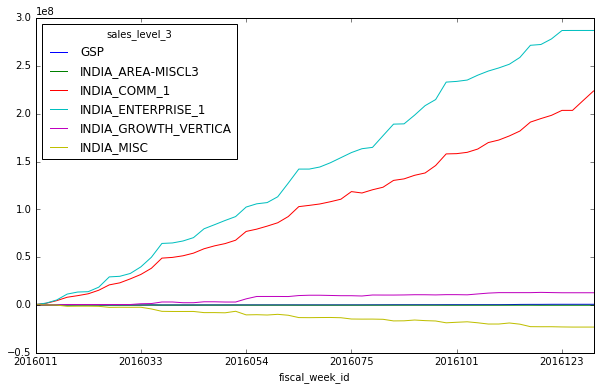

In [94]:
result = df_fy16_exit_proj.groupby(['sales_level_3','fiscal_week_id'])['booking_net'].sum()
result.unstack('sales_level_3').fillna(0).cumsum().plot()